<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Vanilla-model---with-and-without-augmentation" data-toc-modified-id="Vanilla-model---with-and-without-augmentation-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Vanilla model - with and without augmentation</a></span></li><li><span><a href="#Trained-on-a-fraction-of-the-data---average-loss-train/test" data-toc-modified-id="Trained-on-a-fraction-of-the-data---average-loss-train/test-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Trained on a fraction of the data - average loss train/test</a></span></li><li><span><a href="#Test-set-performance" data-toc-modified-id="Test-set-performance-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Test set performance</a></span></li><li><span><a href="#Visualize-mistakes-on-test-set" data-toc-modified-id="Visualize-mistakes-on-test-set-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Visualize mistakes on test set</a></span></li><li><span><a href="#Visualize-kernels" data-toc-modified-id="Visualize-kernels-5"><span class="toc-item-num">5&nbsp;&nbsp;</span>Visualize kernels</a></span></li><li><span><a href="#Confusion-Matrix-on-test-set" data-toc-modified-id="Confusion-Matrix-on-test-set-6"><span class="toc-item-num">6&nbsp;&nbsp;</span>Confusion Matrix on test set</a></span></li></ul></div>

In [52]:
import os
import torch
import numpy as np
import matplotlib.pyplot as plt
from torchvision import datasets, transforms
from main import test, ConvNet
from sklearn.metrics import confusion_matrix
%reload_ext autoreload
%autoreload 2

In [53]:
epochs = [e+1 for e in range(10)]

In [54]:
def plot_accuracy(accs, labels, title):
    for acc in accs:
        plt.plot(epochs, acc)
    plt.xticks(epochs)
    plt.xlabel('epochs')
    plt.ylabel('accuracy')
    plt.legend(labels=labels)
    plt.title(title)
    plt.show()

# Vanilla model - with and without augmentation

In [57]:
# vanilla model (no augmentation)
vanilla_train_accuracies = [84.77058823529411, 91.85490196078432, 93.08823529411765, 93.69803921568628, 94.06470588235294, 94.33921568627451, 94.40588235294118, 94.7235294117647, 94.76862745098039, 94.68823529411765]
vanilla_val_accuracies = [95.28888888888889, 96.35555555555555, 96.76666666666667, 97.0, 97.1, 97.2, 97.2, 97.23333333333333, 97.28888888888889, 97.32222222222222]

# vanilla augmented
vanilla_augmented_train_accuracies = [63.39607843137255, 77.30196078431372, 79.91176470588235, 81.05294117647058, 82.2235294117647, 82.72549019607843, 83.13921568627451, 83.20196078431373, 83.52745098039216, 83.55882352941177]
vanilla_augmented_val_accuracies = [92.63333333333334, 94.72222222222223, 95.25555555555556, 95.83333333333333, 95.9888888888889, 96.06666666666666, 96.22222222222223, 96.12222222222222, 96.25555555555556, 96.26666666666667]
vanilla_augmnoshear_val_accuracies = [94.37777777777778, 95.24444444444444, 95.4, 95.91111111111111, 96.2, 96.42222222222222, 96.43333333333334, 96.33333333333333, 96.42222222222222, 96.53333333333333]
vanilla_augmnoshearnorot_val_accuracies = [94.18888888888888, 95.2, 95.4888888888889, 96.11111111111111, 96.28888888888889, 96.13333333333334, 96.26666666666667, 96.33333333333333, 96.35555555555555, 96.34444444444445]
vanilla_augmnoshearnotrans_val_accuracies = [94.43333333333334, 95.76666666666667, 96.07777777777778, 96.42222222222222, 96.5111111111111, 96.77777777777777, 96.74444444444444, 96.95555555555555, 97.0111111111111, 96.97777777777777]

In [58]:
['train accuracy', 'val accuracy']
'accuracies with augmentation'

'accuracies with augmentation'

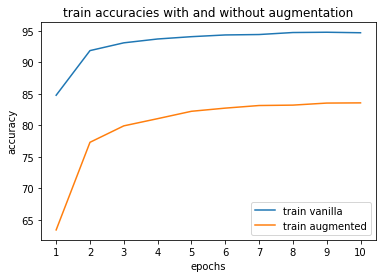

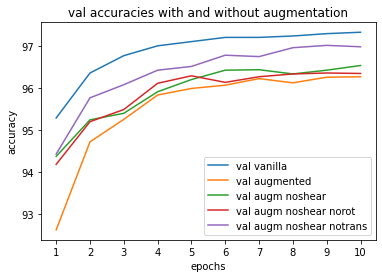

In [71]:
# PLOT: training accuracies
plot_accuracy([vanilla_train_accuracies, vanilla_augmented_train_accuracies],
              ['train vanilla', 'train augmented'],
              'train accuracies with and without augmentation')

# PLOT: validation accuracies
plot_accuracy([vanilla_val_accuracies,
               vanilla_augmented_val_accuracies,
               vanilla_augmnoshear_val_accuracies,
               vanilla_augmnoshearnorot_val_accuracies,
               vanilla_augmnoshearnotrans_val_accuracies
              ],
              ['val vanilla', 'val augmented', 'val augm noshear', 'val augm noshear norot', 'val augm noshear notrans'],
              'val accuracies with and without augmentation')

# Trained on a fraction of the data - average loss train/test

In [60]:
def plot_losses(losses, labels, title):
    for loss in losses:
        plt.plot(fractions, loss)
    plt.xticks(fractions)
    plt.xscale('log')
    plt.yscale('log')
    plt.xlabel('fraction of data used for training')
    plt.ylabel('loss')
    plt.legend(labels=labels)
    plt.title(title)
    plt.show()

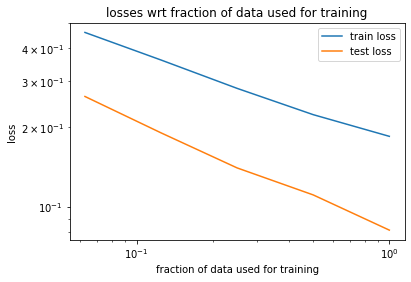

In [61]:
fractions = [1/16, 1/8, 1/4, 1/2, 1]
train_losses = [0.46015493834994975, 0.3613544351213119, 0.28180699340969906, 0.22381099788114137, 0.1850829833664146]
train_accuracies = [87.57, 90.26, 92.26, 93.85, 94.69]
test_losses = [0.262497590637207, 0.1908066345214844, 0.1403192123413086, 0.11073923645019532, 0.08133842163085937]
test_accuracies = [92.65, 94.52, 96.0, 96.73, 97.62]


plot_losses([train_losses, test_losses],
            ['train loss', 'test loss'],
            'losses wrt fraction of data used for training')

# Test set performance

In [62]:
# Load vanilla trained on whole dataset from checkpoint
checkpoint = 'mnist_model_e10_boostcap.pt'
model_path = os.path.join('./models', checkpoint)
assert os.path.exists(model_path)
print('Loading model from {}'.format(model_path))
device = 'cpu'
model = ConvNet().to(device)
model.load_state_dict(torch.load(model_path))

# Test dataset -- no augmentation
test_dataset = datasets.MNIST('./data', train=False,
            transform=transforms.Compose([
                transforms.ToTensor(),
                transforms.Normalize((0.1307,), (0.3081,))
            ]))
test_loader = torch.utils.data.DataLoader(
    test_dataset, batch_size=1000, shuffle=False)

# Inference on test set
test_accuracy, test_loss, true_labels, pred_labels  = test(model, device, test_loader, "Test", return_labels=True)

Loading model from ./models/mnist_model_e10_boostcap.pt

Test set: Average loss: 0.0679, Accuracy: 9790/10000 (97.90%)



In [63]:

# select mistakes

# plot

# Visualize kernels

In [64]:
# first layer kernels
kernels = model.conv1.weight.data.numpy()

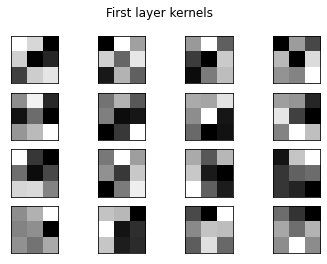

In [75]:
fig, axs = plt.subplots(4, 4)

# original
for i, ax in enumerate(axs[0]):
    ax.imshow(kernels[i][0], cmap='gray')
for i, ax in enumerate(axs[1]):
    ax.imshow(kernels[i+4][0], cmap='gray')
for i, ax in enumerate(axs[2]):
    ax.imshow(kernels[i+8][0], cmap='gray')
for i, ax in enumerate(axs[3]):
    ax.imshow(kernels[i+12][0], cmap='gray')
for ax in [i for j in range(4) for i in axs[j]]:
    ax.set_xticks([])
    ax.set_yticks([])

plt.suptitle('First layer kernels')
plt.show()

# Confusion Matrix on test set

In [66]:
conf_matrix = confusion_matrix(true_labels, pred_labels)
conf_matrix

array([[ 971,    0,    0,    1,    0,    0,    4,    1,    3,    0],
       [   0, 1124,    0,    3,    0,    0,    2,    2,    4,    0],
       [   3,    1, 1009,    2,    2,    0,    1,    9,    5,    0],
       [   1,    0,    3,  985,    0,    8,    0,    6,    7,    0],
       [   0,    0,    1,    0,  961,    1,    4,    1,    3,   11],
       [   2,    0,    0,    4,    0,  876,    5,    1,    3,    1],
       [   7,    3,    1,    1,    2,    6,  937,    0,    1,    0],
       [   0,    2,    7,    3,    2,    0,    0, 1004,    1,    9],
       [   6,    0,    4,    4,    2,    3,    3,    3,  944,    5],
       [   3,    4,    0,    5,    7,    2,    0,    6,    3,  979]])

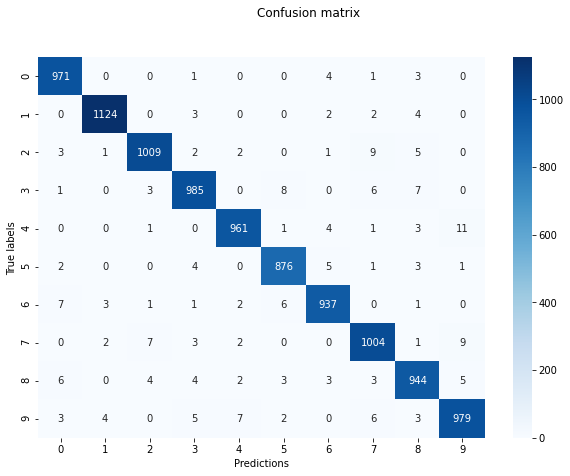

In [76]:
# make the confusion matrix all pretty!
import seaborn as sn
import pandas as pd
df_cm = pd.DataFrame(conf_matrix, #/np.sum(confusion_matrix, axis=0), # to get %age by class
                     index = [i for i in range(10)],
                     columns = [i for i in range(10)])
plt.figure(figsize = (10,7))
sn.heatmap(df_cm, annot=True, cmap='Blues', fmt='g')
plt.ylabel('True labels')
plt.xlabel('Predictions')
plt.suptitle('Confusion matrix')
plt.show()

# Visualize mistakes on test set

In [68]:
def find_misclass(true, pred, y_true, y_pred):
    misclassified_indices = []
    for i in range(len(y_true)):
        if y_true[i] == true and y_pred[i] == pred:
            misclassified_indices.append(i)
    return(misclassified_indices)

def plot_misclass(true, pred, y_true, y_pred):
    misclassified_indices = find_misclass(true, pred, y_true, y_pred)
    fig, axs = plt.subplots(1, 4)
    for i, ax in enumerate(axs):
        misclassf = misclassified_indices[-i]
        ax.imshow(test_dataset[misclassf][0][0],cmap='gray')
        if i == 0: ax.set_ylabel('{} ~ {}'.format(true, pred))
        ax.set_xticks([])
        ax.set_yticks([])
    plt.show()
        

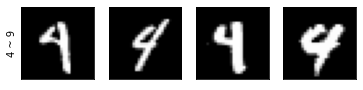

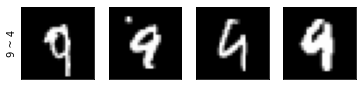

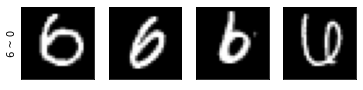

In [69]:
# 4 misclassified as 9
plot_misclass(4, 9, true_labels, pred_labels)

# 9 misclassified as 4
plot_misclass(9, 4, true_labels, pred_labels)

# 6 misclassified as 0
plot_misclass(6, 0, true_labels, pred_labels)

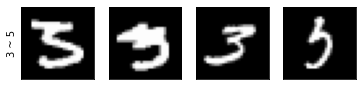

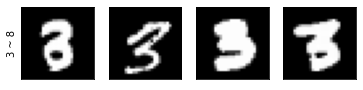

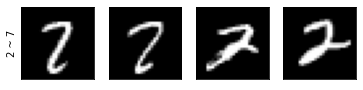

In [70]:
# 3 misclassified as 5
plot_misclass(3, 5, true_labels, pred_labels)

# 3 misclassified as 8
plot_misclass(3, 8, true_labels, pred_labels)

# 2 misclassified as 7
plot_misclass(2, 7, true_labels, pred_labels)

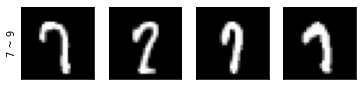

In [77]:
# 7 misclassified as 9
plot_misclass(7, 9, true_labels, pred_labels)